In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib notebook
# %matplotlib inline

In [2]:
states = ['Baden-Württemberg','Bayern','Berlin','Brandenburg','Bremen','Hamburg','Hessen','Mecklenburg-Vorpommern',
         'Niedersachsen','Nordrhein-Westfalen','Rheinland-Pfalz','Saarland','Sachsen','Sachsen-Anhalt',
         'Schleswig-Holstein','Thüringen']

num_of_cases = [3668,2960,866,254,142,587,1080,165,1023,3542,938,187,567,188,308,187]

num_of_death = [16,19,1,0,0,0,2,0,0,6,1,0,0,1,1,0]

In [3]:
data_dict = {'states':states, 'num_of_cases':num_of_cases, 'num_of_death':num_of_death}

In [4]:
df = pd.DataFrame(data=data_dict)

In [ ]:
df.head()

<IPython.core.display.Javascript object>


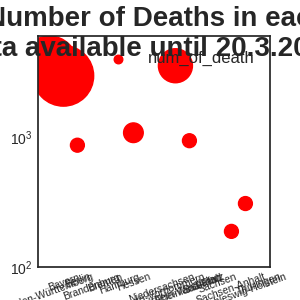

In [5]:
plt.style.use('seaborn-white')

fig = plt.figure()
fig.suptitle('Corona Cases and Number of Deaths in each State in Germany\n(data available until 20.3.2020)', fontsize=20,
            weight='bold')
fig.set_size_inches(3, 3, forward=True)

plt.scatter(df['states'].values, df['num_of_cases'].values, s=100*df['num_of_death'].values, label='num_of_death',
           c='red')

plt.ylabel('Number of Cases', fontsize=15)
plt.xlabel('States', fontsize=15)
plt.gca()

# plt.grid()
# plt.gca().set_ylim(0)
plt.xticks(rotation=20, fontsize=7.5)

plt.yscale('symlog')
plt.ylim(100, 6000)

plt.legend(loc="upper right", fontsize=12, markerscale=0.2)
plt.savefig("cases.png")
plt.show()

In [ ]:


# Utils widgets
from ipywidgets import Button, Layout, jslink, IntText, IntSlider

def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

top_left_button = create_expanded_button("Top left", 'info')
top_right_button = create_expanded_button("Top right", 'success')
bottom_left_button = create_expanded_button("Bottom left", 'danger')
bottom_right_button = create_expanded_button("Bottom right", 'warning')

top_left_text = IntText(description='Top left', layout=Layout(width='auto', height='auto'))
top_right_text = IntText(description='Top right', layout=Layout(width='auto', height='auto'))
bottom_left_slider = IntSlider(description='Bottom left', layout=Layout(width='auto', height='auto'))
bottom_right_slider = IntSlider(description='Bottom right', layout=Layout(width='auto', height='auto'))



In [ ]:

from ipywidgets import AppLayout, Button, Layout



header_button = create_expanded_button('Header', 'success')
left_button = create_expanded_button('Left', 'info')
center_button = create_expanded_button('Center', 'warning')
right_button = create_expanded_button('Right', 'info')
footer_button = create_expanded_button('Footer', 'success')

AppLayout(header=header_button,
          left_sidebar=left_button,
          center=center_button,
          right_sidebar=right_button,
          footer=footer_button)

In [ ]:
file = pd.read_csv("RKI_COVID19.csv")

In [ ]:
file.head()

In [ ]:
m = file[file['Geschlecht']=='M'].count().unique()
w = file[file['Geschlecht']=='W'].count().unique()
u = file[file['Geschlecht']=='unbekannt'].count().unique()

In [ ]:
w = np.asscalar(w)
m = np.asscalar(m)
u = np.asscalar(u)

In [ ]:
print("num of female: ", w)
print("\nnum of male: ", m)
print("\nnum of unknown: ", u)

In [ ]:
def perc(gender):
    if gender == 'w':
        percentage = (w*100)/(len(file.index))
        percentage = np.round_(percentage, decimals=2)

    elif gender == 'm':
        percentage = (m*100)/(len(file.index))
        percentage = np.round_(percentage, decimals=2)

    else:
        percentage = (u*100)/(len(file.index))
        percentage = np.round_(percentage, decimals=2)
    return percentage
    

female_percentage = perc('w')
male_percentage = perc('m')
unknown_percentage = perc('u')

In [ ]:
labels = ['female', 'male', 'unknown']
sizes = [female_percentage, male_percentage, unknown_percentage]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']


fig, ax = plt.subplots()
ax.set_title('Corona Gender Portion\n(data available until 20.03.2020)', fontsize=20, weight='bold')
fig.set_size_inches(14, 7, forward=True)

wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=45, colors=colors)

legend = ax.legend(wedges, labels,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0, 1), fontsize=14)

plt.setp(autotexts, size=12, weight="bold")
legend.get_title().set_fontsize('16') 

ax.axis('equal')  
plt.savefig("gender.png")

plt.show()

In [ ]:
age = file['Altersgruppe'].unique()
age

In [ ]:
g0_4 = file[file['Altersgruppe']=='A00-A04'].filter(items=['AnzahlFall']).sum()
g0_4 = np.asscalar(g0_4)
g5_14 = file[file['Altersgruppe']=='A05-A14'].filter(items=['AnzahlFall']).sum()
g5_14 = np.asscalar(g5_14)
g15_34 = file[file['Altersgruppe']=='A15-A34'].filter(items=['AnzahlFall']).sum()
g15_34 = np.asscalar(g15_34)
g35_59 = file[file['Altersgruppe']=='A35-A59'].filter(items=['AnzahlFall']).sum()
g35_59 = np.asscalar(g35_59)
g60_79 = file[file['Altersgruppe']=='A60-A79'].filter(items=['AnzahlFall']).sum()
g60_79 = np.asscalar(g60_79)
g80 = file[file['Altersgruppe']=='A80+'].filter(items=['AnzahlFall']).sum()
g80 = np.asscalar(g80)
unknown = file[file['Altersgruppe']=='unbekannt'].filter(items=['AnzahlFall']).sum()
unknown = np.asscalar(unknown)

height1 = [g0_4,g5_14,g15_34,g35_59,g60_79,g80,unknown]

In [ ]:
g0_4 = file[file['Altersgruppe']=='A00-A04'].filter(items=['AnzahlTodesfall']).sum()
g0_4 = np.asscalar(g0_4)
g5_14 = file[file['Altersgruppe']=='A05-A14'].filter(items=['AnzahlTodesfall']).sum()
g5_14 = np.asscalar(g5_14)
g15_34 = file[file['Altersgruppe']=='A15-A34'].filter(items=['AnzahlTodesfall']).sum()
g15_34 = np.asscalar(g15_34)
g35_59 = file[file['Altersgruppe']=='A35-A59'].filter(items=['AnzahlTodesfall']).sum()
g35_59 = np.asscalar(g35_59)
g60_79 = file[file['Altersgruppe']=='A60-A79'].filter(items=['AnzahlTodesfall']).sum()
g60_79 = np.asscalar(g60_79)
g80 = file[file['Altersgruppe']=='A80+'].filter(items=['AnzahlTodesfall']).sum()
g80 = np.asscalar(g80)
unknown = file[file['Altersgruppe']=='unbekannt'].filter(items=['AnzahlTodesfall']).sum()
unknown = np.asscalar(unknown)

height2 = [g0_4,g5_14,g15_34,g35_59,g60_79,g80,unknown]

In [ ]:
fig = plt.figure()
fig.set_size_inches(14,7, forward=True)
fig.suptitle("Comparison between Age of current Patients and Deads\n(data available until 20.03.2020)", fontsize=20, weight='bold')

bar_width = 0.7

plt.bar(x=np.sort(file['Altersgruppe'].unique()), height=height1, width=bar_width, color='green', label='patients')

plt.bar(x=np.sort(file['Altersgruppe'].unique()), height=height2, width=bar_width, color='orange', label= 'dead')

plt.ylabel('Number', fontsize=15)
plt.xlabel('Age Groups', fontsize=15)
plt.gca()

plt.xticks(rotation=20, fontsize=12)

# plt.yscale('log')
# plt.ylim(0, 5000)

plt.legend(loc="upper right", fontsize=12, markerscale=0.2)
plt.savefig("patients_vs_dead.png")
plt.show()

In [ ]:
file['Bundesland'].nunique()

In [ ]:
file['Meldedatum'] = pd.to_datetime(file['Meldedatum'])

In [ ]:
file['Date'] = file['Meldedatum'].dt.date

In [ ]:
# date_table_agg = file.groupby(['Bundesland','Date']).agg(['sum']).reset_index()
# date_table_agg = date_table_agg.drop(['Lat','Long'],1)
table = file.groupby(['Bundesland','Date'])['AnzahlFall'].sum().reset_index()

In [ ]:
table

In [ ]:
states_pivot_table = pd.pivot_table(table, values='AnzahlFall', columns=['Date'], index=['Bundesland'])
states_pivot_table

In [ ]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(14,7))        
ax.set_title("Corona Cases in States of Germany \n(data available until 20.03.2020)", size=20, weight='bold')
sns.set(font_scale=1.2)

ax = sns.heatmap(states_pivot_table, cmap='plasma', ax=ax, cbar_kws={'label': 'Number of Patients'})
borders = range(1,18)
ax.hlines(borders[:], color='white', *ax.get_xlim())

plt.subplots_adjust(left=0.16, bottom=0.12, top=0.9)
ax.set_xlabel('Timestamp',fontsize=18)
ax.set_ylabel('States',fontsize=18)

plt.savefig("heatmap.png")
